In [27]:
# basic module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
import glob
import time
import pickle

plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = False


# image module
import cv2
from pydicom import dcmread
import pylibjpeg
from PIL import Image
import pydicom as dcm
from pydicom import dcmread
from pydicom.data import get_testdata_file



# dataset
df = pd.read_csv('dataset.csv',index_col=0)

In [28]:
dcmpath = list(df['orginal_dcm_file'])

In [29]:
test= dcmpath[0]
test

'/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A1.0-2개월/H05_00019_02/org/H05_00019_02.dcm'

In [33]:
dcm = dcmread(test).pixel_array

In [43]:
fname = test.replace('.dcm','.png')


'/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A1.0-2개월/H05_00019_02/org/H05_00019_02.png'

In [42]:
plt.imsave(fname,dcm)

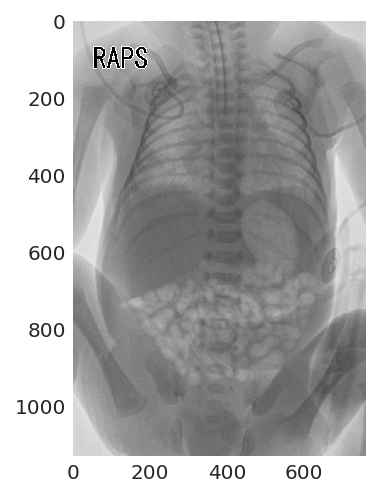

In [31]:
plt.imshow(dcm)

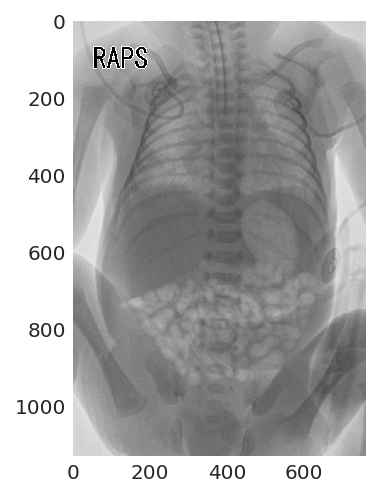

In [44]:
A = cv2.imread('H05_00019_02.png')
plt.imshow(A)

In [45]:
A.shape

(1131, 760, 3)

In [47]:
correct = []
error = []
for dcm in dcmpath:
    try:
        dcm_img = dcmread(dcm).pixel_array
        fname = dcm.replace('.dcm','.png')
        plt.imsave(fname,dcm_img)
        correct.append(fname)
        print(fname.'      [완료]')
        
    except Exception as e:
        print('\n',e)
        print(dcm,'      [오류] ','\n')
        error.append(dcm)